In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

GET DATA / CLEAN DATA

In [3]:
# school_data = pd.read_csv('ScoresSalsDems.csv')
school_data = pd.read_csv('Updated.csv')
school_data.drop(['Unnamed: 0', 'Level', 'Low Grade', 'High Grade', 'Sch Name', 'Div Name','Div Num', 'Sch Num', 'DistrictCity', '2016-2017 Pass Rate', '2017-2018 Pass Rate', 'Rating', 'ParentRating', 'NumReviews'], inplace=True, axis=1)
# school_data.drop(['Unnamed: 0', 'Level', 'Sch Name', 'Div Name', 'DistrictCity'], inplace=True, axis=1)
school_data

,Sch Type,Subject,Subgroup,2018-2019 Pass Rate,Salary2017Dist,Salary2018Dist,PopulationDist,MedianageDist,PercentWhiteDist,PercentBlackDist,PercentAsianDist,PercentLatinoDist,HighSchoolGraduateDist,SomeCollegeDist,AssociatesDist,BachelorsDist,GraduateDist,MedianIncomeDist,Latitude,Longitude,PercentLowIncome,Enrollment,PercentAsianSch,PercentBlackSch,PercentHispanicSch,PercentWhiteSch,PercentMultiethSch,PercentNativeSch,StudentsPerTeacher,PercentIslanderSch,MissingRatio,MissingEnrollment
0,Elem,English: Reading,All Students,64,47512.0,47296.0,32840.0,46.0,68.4,28.4,0.7,8.8,39.0,17.3,6.3,11.4,8.2,42260.0,37.680653,-75.669830,72.0,550.0,3.0,38.0,28.0,31.0,0.0,0.0,14.0,0.0,0.0,0.0
1,Elem,History and Social Sciences,All Students,84,47512.0,47296.0,32840.0,46.0,68.4,28.4,0.7,8.8,39.0,17.3,6.3,11.4,8.2,42260.0,37.680653,-75.669830,72.0,550.0,3.0,38.0,28.0,31.0,0.0,0.0,14.0,0.0,0.0,0.0
2,Elem,Mathematics,All Students,79,47512.0,47296.0,32840.0,46.0,68.4,28.4,0.7,8.8,39.0,17.3,6.3,11.4,8.2,42260.0,37.680653,-75.669830,72.0,550.0,3.0,38.0,28.0,31.0,0.0,0.0,14.0,0.0,0.0,0.0
3,Elem,Science,All Students,79,47512.0,47296.0,32840.0,46.0,68.4,28.4,0.7,8.8,39.0,17.3,6.3,11.4,8.2,42260.0,37.680653,-75.669830,72.0,550.0,3.0,38.0,28.0,31.0,0.0,0.0,14.0,0.0,0.0,0.0
4,Elem,English: Reading,Asian,100,47512.0,47296.0,32840.0,46.0,68.4,28.4,0.7,8.8,39.0,17.3,6.3,11.4,8.2,42260.0,37.680653,-75.669830,72.0,550.0,3.0,38.0,28.0,31.0,0.0,0.0,14.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57670,Middle,English: Reading,White,85,52505.0,53115.0,67196.0,39.6,76.3,12.8,5.3,6.0,19.0,20.8,10.6,23.2,20.4,86781.0,37.225616,-76.517052,29.0,746.0,4.0,13.0,9.0,65.0,8.0,0.0,16.0,1.0,0.0,0.0
57671,Middle,English: Writing,White,76,52505.0,53115.0,67196.0,39.6,76.3,12.8,5.3,6.0,19.0,20.8,10.6,23.2,20.4,86781.0,37.225616,-76.517052,29.0,746.0,4.0,13.0,9.0,65.0,8.0,0.0,16.0,1.0,0.0,0.0
57672,Middle,History and Social Sciences,White,91,52505.0,53115.0,67196.0,39.6,76.3,12.8,5.3,6.0,19.0,20.8,10.6,23.2,20.4,86781.0,37.225616,-76.517052,29.0,746.0,4.0,13.0,9.0,65.0,8.0,0.0,16.0,1.0,0.0,0.0
57673,Middle,Mathematics,White,92,52505.0,53115.0,67196.0,39.6,76.3,12.8,5.3,6.0,19.0,20.8,10.6,23.2,20.4,86781.0,37.225616,-76.517052,29.0,746.0,4.0,13.0,9.0,65.0,8.0,0.0,16.0,1.0,0.0,0.0


In [5]:
school_data.describe()

,Salary2017Dist,Salary2018Dist,PopulationDist,MedianageDist,PercentWhiteDist,PercentBlackDist,PercentAsianDist,PercentLatinoDist,HighSchoolGraduateDist,SomeCollegeDist,AssociatesDist,BachelorsDist,GraduateDist,MedianIncomeDist,Latitude,Longitude,PercentLowIncome,Enrollment,PercentAsianSch,PercentBlackSch,PercentHispanicSch,PercentWhiteSch,PercentMultiethSch,PercentNativeSch,StudentsPerTeacher,PercentIslanderSch,MissingRatio,MissingEnrollment
count,57675.000000,57675.000000,5.767500e+04,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.0
mean,55330.179541,56411.776801,2.858688e+05,39.233039,69.890753,18.181006,5.947924,8.830313,25.225025,19.463868,7.472470,20.870266,15.315039,75120.391313,37.908701,-78.048913,47.191983,759.836012,5.955665,21.603277,15.231019,51.653108,5.166831,0.148817,14.101723,0.061569,0.003936,0.0
std,9623.051952,10054.054928,3.622108e+05,4.853361,15.502352,14.370605,6.636096,6.594783,8.856797,4.263230,1.773748,8.112025,8.905721,30258.364115,0.818602,1.454650,26.642902,497.130209,9.137485,22.725419,15.819618,26.827601,2.784889,0.380583,2.442369,0.243170,0.062613,0.0
min,37116.000000,37440.000000,2.213000e+03,21.600000,17.200000,0.000000,0.000000,0.000000,7.300000,8.400000,2.900000,4.500000,2.800000,26971.000000,36.568291,-83.408035,0.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.0
25%,48696.000000,49174.000000,4.191100e+04,35.800000,60.700000,7.600000,0.900000,3.200000,19.000000,16.400000,6.000000,14.500000,8.900000,48727.000000,37.186195,-78.773354,26.000000,460.000000,1.000000,5.000000,5.000000,30.000000,3.000000,0.000000,13.000000,0.000000,0.000000,0.0
50%,51942.000000,52854.000000,1.301590e+05,38.300000,67.000000,12.800000,3.000000,7.200000,26.000000,20.300000,7.700000,21.800000,13.500000,67196.000000,37.733265,-77.508736,46.000000,626.000000,2.000000,12.000000,9.000000,52.000000,5.000000,0.000000,14.000000,0.000000,0.000000,0.0
75%,65678.000000,65761.000000,3.745580e+05,42.800000,82.400000,28.300000,8.200000,13.500000,32.700000,21.800000,8.900000,26.000000,20.400000,101629.000000,38.768887,-77.240128,65.000000,902.000000,7.000000,31.000000,20.000000,75.000000,7.000000,0.000000,16.000000,0.000000,0.000000,0.0
max,84390.000000,88323.000000,1.142004e+06,60.500000,99.400000,75.700000,18.900000,37.800000,44.800000,30.000000,12.100000,35.600000,42.500000,129588.000000,39.269447,-75.356628,99.000000,4297.000000,68.000000,98.000000,85.000000,100.000000,21.000000,3.000000,34.000000,2.000000,1.000000,0.0


In [7]:
print(school_data.shape)
school_data.dropna(axis=0, how='any', inplace=True)
print(school_data.shape)
school_data = school_data[school_data['2018-2019 Pass Rate'] != '<']
print(school_data.shape)
# school_data = school_data[school_data['2016-2017 Pass Rate'] != '<']
# print(school_data.shape)
# school_data = school_data[school_data['2017-2018 Pass Rate'] != '<']
# print(school_data.shape)

school_data['2018-2019 Pass Rate'] = school_data['2018-2019 Pass Rate'].astype('int64')
# school_data['2016-2017 Pass Rate'] = school_data['2016-2017 Pass Rate'].astype('int64')
# school_data['2017-2018 Pass Rate'] = school_data['2017-2018 Pass Rate'].astype('int64')
# school_data['2018-2019 Pass Rate'].replace('<', )
# pd.to_numeric(school_data['2018-2019 Pass Rate'])#s, downcast='float')



(57675, 32)
(57675, 32)
(53472, 32)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [9]:
school_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53472 entries, 0 to 57674
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sch Type                53472 non-null  object 
 1   Subject                 53472 non-null  object 
 2   Subgroup                53472 non-null  object 
 3   2018-2019 Pass Rate     53472 non-null  int64  
 4   Salary2017Dist          53472 non-null  float64
 5   Salary2018Dist          53472 non-null  float64
 6   PopulationDist          53472 non-null  float64
 7   MedianageDist           53472 non-null  float64
 8   PercentWhiteDist        53472 non-null  float64
 9   PercentBlackDist        53472 non-null  float64
 10  PercentAsianDist        53472 non-null  float64
 11  PercentLatinoDist       53472 non-null  float64
 12  HighSchoolGraduateDist  53472 non-null  float64
 13  SomeCollegeDist         53472 non-null  float64
 14  AssociatesDist          53472 non-null

In [10]:
# 'Div Name', 'Sch Type', 'Subject', 'Subgroup']
school_data['Subgroup'].value_counts()

All Students                  6261
Male                          6257
Female                        6253
Economically Disadvantaged    6170
White                         6084
Students with Disabilities    6062
Black                         5175
Hispanic                      4984
English Learners              3227
Asian                         2999
Name: Subgroup, dtype: int64

In [0]:
full_data = school_data.copy()
full_data.drop(['2018-2019 Pass Rate'], axis=1, inplace=True)

In [11]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(school_data, test_size=0.2)
train_labels = train_data[['2018-2019 Pass Rate']].copy()
test_labels = test_data[['2018-2019 Pass Rate']].copy()
train_data.drop(['2018-2019 Pass Rate'], axis=1, inplace=True)
test_data.drop(['2018-2019 Pass Rate'], axis=1, inplace=True)
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(42777, 31)
(42777, 1)
(10695, 31)
(10695, 1)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
train_data.head()

,Sch Type,Low Grade,High Grade,Subject,Subgroup,Salary2017Dist,Salary2018Dist,PopulationDist,MedianageDist,PercentWhiteDist,PercentBlackDist,PercentAsianDist,PercentLatinoDist,HighSchoolGraduateDist,SomeCollegeDist,AssociatesDist,BachelorsDist,GraduateDist,MedianIncomeDist,Latitude,Longitude,PercentLowIncome,Enrollment,PercentAsianSch,PercentBlackSch,PercentHispanicSch,PercentWhiteSch,PercentMultiethSch,PercentNativeSch,StudentsPerTeacher,PercentIslanderSch,MissingRatio,MissingEnrollment
52907,Elem,0,5,Science,Economically Disadvantaged,56462.0,52618.0,139382.0,35.6,68.9,17.0,3.1,11.7,22.4,23.7,8.9,22.7,15.9,103005.0,38.402428,-77.563461,39.0,587.0,6.0,18.0,12.0,56.0,9.0,0.0,15.0,0.0,0.0,0.0
15851,High,9,12,Science,Male,68883.0,71076.0,1142004.0,37.9,62.5,9.7,18.9,16.2,12.9,13.2,5.4,31.0,29.7,117515.0,38.779858,-77.169823,53.0,1786.0,23.0,13.0,45.0,16.0,2.0,0.0,13.0,0.0,0.0,0.0
9438,Elem,0,5,History and Social Sciences,Female,48696.0,49174.0,335594.0,38.8,68.3,22.7,3.5,8.2,23.8,21.2,8.5,23.8,14.5,76969.0,37.382599,-77.652000,17.0,881.0,3.0,12.0,6.0,72.0,6.0,0.0,17.0,0.0,0.0,0.0
27707,Elem,0,5,English: Reading,English Learners,50743.0,51270.0,324073.0,38.3,57.5,29.5,8.0,5.4,22.0,20.2,6.9,26.0,16.1,66447.0,37.602528,-77.538788,43.0,350.0,11.0,12.0,22.0,48.0,7.0,0.0,15.0,1.0,0.0,0.0
18055,Middle,7,8,History and Social Sciences,Students with Disabilities,68883.0,71076.0,1142004.0,37.9,62.5,9.7,18.9,16.2,12.9,13.2,5.4,31.0,29.7,117515.0,38.857670,-77.454956,29.0,768.0,13.0,8.0,29.0,45.0,4.0,0.0,13.0,0.0,0.0,0.0


In [14]:
print(school_data.describe())

       2018-2019 Pass Rate  Salary2017Dist  ...  MissingRatio  MissingEnrollment
count         53472.000000    53472.000000  ...  53472.000000            53472.0
mean             72.909523    55626.815099  ...      0.003909                0.0
std              18.916629     9679.175115  ...      0.062397                0.0
min               0.000000    37116.000000  ...      0.000000                0.0
25%              63.000000    48696.000000  ...      0.000000                0.0
50%              77.000000    52428.000000  ...      0.000000                0.0
75%              87.000000    65678.000000  ...      0.000000                0.0
max             100.000000    84390.000000  ...      1.000000                0.0

[8 rows x 29 columns]


In [0]:
print(school_data.Longitude.min(),school_data.Longitude.max())
print(school_data.Latitude.min(),school_data.Latitude.max())

-83.408035 -75.356628
36.568291 39.269447


In [0]:
school_data['2018-2019 Pass Rate'].max()

100

No handles with labels found to put in legend.


[0, 0.2, 0.4, 0.6, 0.8, 1]


<Figure size 720x504 with 0 Axes>

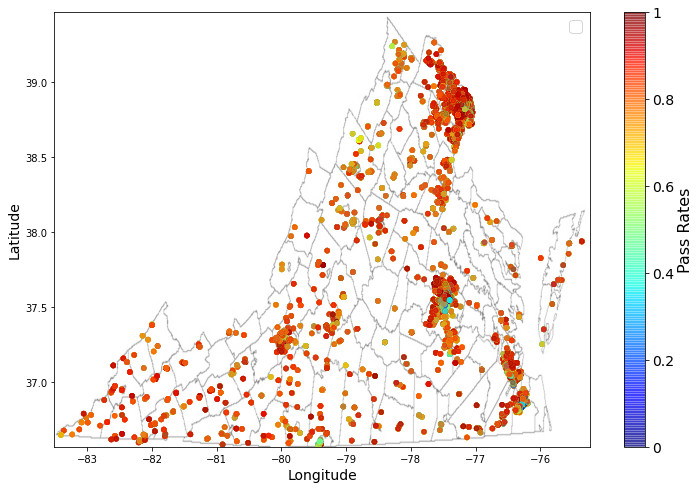

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# plt.scatter(school_data.Latitude, school_data.Longitude)
# plt.figure(figsize=(10,8))
# plt.scatter(school_data.Longitude, school_data.Latitude)
# va_img =mpimg.imread('virginia.png')
va_img = plt.imread('virginia2.png')
plt.figure(figsize=(10,7))

ax = school_data.plot(kind='scatter', x='Longitude', y='Latitude', figsize=(12,8),
                alpha=0.3,
                # s=school_data['PopulationDist']/100,
                 c=school_data['2018-2019 Pass Rate']/100,
                 cmap=plt.get_cmap('jet'), colorbar=False)

plt.imshow(va_img, extent=[-83.508035, -75.23, 36.568291,39.469447], alpha=0.5,
           cmap=plt.get_cmap("jet"),aspect='auto')




plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

rates = school_data["2018-2019 Pass Rate"]
# tick_values = np.linspace(rates.min(), rates.max(), 101)
tick_values = [0, 0.2,0.4,0.6,0.8,1]
print(tick_values)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(tick_values, fontsize=14)
cbar.set_label('Pass Rates', fontsize=16)


plt.legend(fontsize=16)

plt.show()



In [0]:

full_data_num = full_data.drop(['Sch Type', 'Subject', 'Subgroup'], axis=1)
full_data_cat = full_data[['Sch Type', 'Subject', 'Subgroup']]

In [0]:
train_data_num = train_data.drop(['Sch Type', 'Subject', 'Subgroup'], axis=1)
train_data_cat = train_data[['Sch Type', 'Subject', 'Subgroup']]

In [16]:
sch_types = list(train_data_cat['Sch Type'].value_counts().index)
print(sch_types)

subject_types = list(train_data_cat['Subject'].value_counts().index)
print(subject_types)

subgroup_types = list(train_data_cat['Subgroup'].value_counts().index)
print(subgroup_types)

cat_feature_types = sch_types.copy()
cat_feature_types.extend(subject_types.copy())
cat_feature_types.extend(subgroup_types.copy())

print(len(cat_feature_types))

['Elem', 'Middle', 'High', 'Combined']
['Mathematics', 'English: Reading', 'Science', 'History and Social Sciences', 'English: Writing']
['All Students', 'Male', 'Female', 'Economically Disadvantaged', 'White', 'Students with Disabilities', 'Black', 'Hispanic', 'English Learners', 'Asian']
19


In [17]:
for s in subject_types:
    print(s,':',school_data[school_data.Subject == s]['2018-2019 Pass Rate'].mean())

Mathematics : 77.06846791525945
English: Reading : 69.34028208307501
Science : 72.657339055794
History and Social Sciences : 74.98974049487025
English: Writing : 66.07760428804474


In [18]:
print(train_data_num.shape)
print(train_data_cat.shape)
train_data.shape

(42777, 28)
(42777, 3)


(42777, 31)

In [0]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

num_attribs = list(train_data_num)
cat_attribs = list(train_data_cat)
# print(num_attribs)
# print(cat_attribs)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

train_data_prep = full_pipeline.fit_transform(train_data)
test_data_prep = full_pipeline.transform(test_data)

In [0]:
full_data_prep = full_pipeline.fit_transform(full_data)

In [0]:
full_data_features = list(full_data_num) + list(full_data_cat)


In [20]:
print(train_data_prep.shape)
feature_list = num_attribs.copy()
feature_list.extend(cat_feature_types)
len(feature_list)

(42777, 47)


47

# Random Forest Model

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [22]:
params = {
    'n_estimators':[50,100,150],
    'max_depth':[2,4,8,None],
    'max_features':['sqrt', 'log2', None]
}

grid = GridSearchCV(RandomForestRegressor(), params, scoring='neg_mean_squared_error', cv=3)
grid.fit(train_data_prep, train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [0]:
print(np.sqrt(-1*grid.best_score_))
print(grid.best_params_)
model = grid.best_estimator_
model

9.25148404703122
{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 150}


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, train_data_prep, train_labels, scoring='neg_mean_squared_error', cv=3, verbose=True)

avg_rmse = 0
for score in scores:
    rmse = np.sqrt(-1*score)
    avg_rmse += rmse

print('Cross Val RMSE:', avg_rmse/3)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Cross Val RMSE: 9.260946579418373


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   35.9s finished


In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
y_train = model.predict(train_data_prep)
rmse = np.sqrt(mean_squared_error(train_labels, y_train))
mae = mean_absolute_error(train_labels, y_train)
print('RMSE:', rmse)
print('MAE:', mae)

NameError: ignored

In [0]:

ypred = model.predict(test_data_prep)
rmse = np.sqrt(mean_squared_error(test_labels, ypred))
mae = mean_absolute_error(test_labels, ypred)
print('Test Results')
print('RMSE:', rmse)
print('MAE:', mae)

Test Results
RMSE: 9.05102757250961
MAE: 6.26173447613111


In [0]:
feature_imp = pd.DataFrame(data=[model.feature_importances_], columns=feature_list).T
feature_imp.columns = ['importance']
feature_imp.sort_values(by='importance', ascending=False)

,importance
English Learners,0.149973
White,0.112922
PercentLowIncome,0.057848
PercentWhiteSch,0.043681
Asian,0.038532
PercentBlackSch,0.036511
Female,0.031002
PercentHispanicSch,0.028943
Latitude,0.028245
Enrollment,0.028137


# XGBoost model

In [0]:
import xgboost as xgb

dtrain = xgb.DMatrix(train_data_prep, label=train_labels)
dtest = xgb.DMatrix(test_data_prep, label=test_labels)

In [24]:
param = {'max_depth': 3, 'eta': 0.07,
         'objective': 'reg:squarederror',
         'eval_metric': 'rmse',
         "n_estimators" : 300}

stop=50

mod = xgb.train(param, dtrain, num_boost_round=10000,
                evals=[(dtrain, "train"), (dtest, "validation")],
                verbose_eval=True,
                early_stopping_rounds=stop)

Streaming output truncated to the last 5000 lines.
[3969]	train-rmse:8.17265	validation-rmse:8.92343
[3970]	train-rmse:8.17243	validation-rmse:8.92351
[3971]	train-rmse:8.17167	validation-rmse:8.92316
[3972]	train-rmse:8.17139	validation-rmse:8.92277
[3973]	train-rmse:8.17113	validation-rmse:8.92241
[3974]	train-rmse:8.17083	validation-rmse:8.92215
[3975]	train-rmse:8.17062	validation-rmse:8.92182
[3976]	train-rmse:8.17041	validation-rmse:8.92174
[3977]	train-rmse:8.17015	validation-rmse:8.92135
[3978]	train-rmse:8.16996	validation-rmse:8.92118
[3979]	train-rmse:8.16986	validation-rmse:8.92112
[3980]	train-rmse:8.16954	validation-rmse:8.92091
[3981]	train-rmse:8.16939	validation-rmse:8.92065
[3982]	train-rmse:8.16874	validation-rmse:8.92004
[3983]	train-rmse:8.16866	validation-rmse:8.91998
[3984]	train-rmse:8.16825	validation-rmse:8.91964
[3985]	train-rmse:8.16795	validation-rmse:8.91952
[3986]	train-rmse:8.16753	validation-rmse:8.91934
[3987]	train-rmse:8.16727	validation-rmse:8.91948

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

ypred = mod.predict(dtest)
rmse = np.sqrt(mean_squared_error(test_labels, ypred))
mae = mean_absolute_error(test_labels, ypred)
print('RMSE:', rmse)
print('MAE:', mae)

RMSE: 8.4496146658835
MAE: 5.943011109324023


In [0]:
dfull = xgb.DMatrix(full_data_prep)

full_pred = mod.predict(dfull)

In [0]:
to_join = full_data.loc[:, ["Predicted"]]

In [72]:
to_join

,Predicted
0,67.448402
1,79.074730
2,80.871346
3,79.044739
4,91.786888
...,...
57670,88.026169
57671,78.318977
57672,88.197975
57673,91.878899


In [0]:
full_data["Predicted"] = full_pred

In [0]:
full_base = pd.read_csv('Updated.csv')

In [0]:
joined = full_base.join(to_join)

In [80]:
np.unique(joined['2018-2019 Pass Rate'])

array(['0', '10', '100', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39',
       '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59',
       '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69',
       '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79',
       '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99',
       '<'], dtype=object)

In [0]:
joined['2018-2019 Pass Rate'] = joined['2018-2019 Pass Rate'].apply(lambda x: np.nan if x == '<' else x)
joined['2018-2019 Pass Rate'] = joined['2018-2019 Pass Rate'].astype(float)
joined['TruePerformance'] = joined['2018-2019 Pass Rate'] - joined['Predicted']

In [0]:
joined.to_csv('FinalReport.csv')

In [0]:
#feature_imp = pd.DataFrame(data=[model.feature_importances_], columns=feature_list).T

importances = dict()
importances["Feature"] = []
importances["Importance"] = []
for key, val in mod.get_score().items():
  importances['Feature'].append(feature_list[int(key[1:])])
  importances['Importance'].append(val)

In [63]:
pd.Series(full_data_features)[~pd.Series(full_data_features).isin(feature_list)]

28    Sch Type
29     Subject
30    Subgroup
dtype: object

In [66]:
pd.DataFrame(importances).sort_values(["Importance"])

,Feature,Importance
45,MissingRatio,59
37,All Students,119
25,Elem,157
44,PercentIslanderSch,243
8,Middle,256
40,GraduateDist,275
30,Salary2018Dist,290
43,PercentNativeSch,292
11,Combined,292
23,High,294


<Figure size 720x576 with 0 Axes>

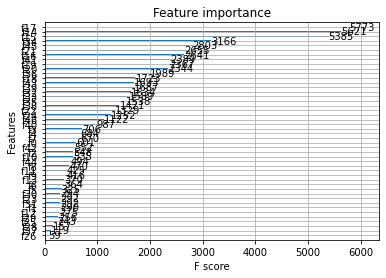

In [29]:
plt.figure(figsize=(10,8))
xgb.plot_importance(mod, importance_type='weight')

<Figure size 720x576 with 0 Axes>

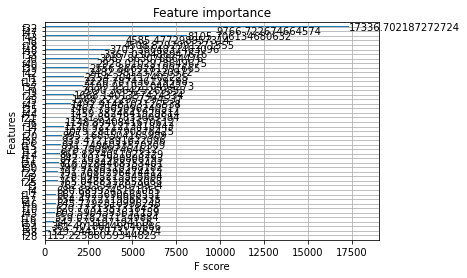

In [0]:
plt.figure(figsize=(10,8))
xgb.plot_importance(mod, importance_type='gain')

<Figure size 720x576 with 0 Axes>

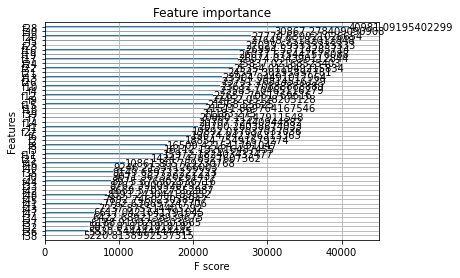

In [0]:
plt.figure(figsize=(10,8))
xgb.plot_importance(mod, importance_type='cover')

# Multiple Linear Regression Model

In [0]:
import sklearn.linear_model as linear

In [0]:
lr = linear.LinearRegression()

In [0]:
lr.fit(train_data_prep, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
ypred = lr.predict(train_data_prep)
rmse = np.sqrt(mean_squared_error(train_labels, ypred))
mae = mean_absolute_error(train_labels, ypred)
print('***Train***')
print('RMSE:', rmse)
print('MAE:', mae)

print('\n***Test***')

ypred = lr.predict(test_data_prep)
rmse = np.sqrt(mean_squared_error(test_labels, ypred))
mae = mean_absolute_error(test_labels, ypred)
print('RMSE:', rmse)
print('MAE:', mae)

***Train***
RMSE: 12.54088838669849
MAE: 9.32350493697627

***Test***
RMSE: 12.651510966768686
MAE: 9.371411918804172


# Lasso Regularization

In [0]:
from sklearn.linear_model import Lasso, LassoCV
lassocv = LassoCV(n_alphas=1000,cv=5,verbose=True)
lassocv.fit(train_data_prep, train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=1000, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=True)

In [0]:
p =lassocv.predict(train_data_prep)
np.sqrt(mean_squared_error(p, train_labels))


12.544125106111412

In [0]:
scores = cross_val_score(lassocv, train_data_prep, train_labels, cv=3, scoring='neg_mean_squared_error')
np.sqrt(np.mean(scores))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

nan

In [0]:
np.sqrt(-1*np.mean(scores))

12.563028941455043

In [0]:
lasso_coefs = pd.DataFrame(data=[lassocv.coef_], columns=feature_list).T
lasso_coefs.columns = ['Lasso Coeficent']
lasso_coefs[lasso_coefs['Lasso Coeficent'] ==0]

,Lasso Coeficent
PercentBlackDist,-0.0
StudentsPerTeacher,-0.0
MissingEnrollment,0.0
English: Writing,0.0


In [0]:
lasso_coefs.shape
feature_imp.shape

(49, 1)

In [0]:
x =pd.concat([feature_imp, lasso_coefs], axis=1)
x['Lasso Coeficent'].sort_values(ascending=False)

Female                         13.630788
Asian                          10.656176
Students with Disabilities      6.059403
All Students                    4.963337
Science                         4.937426
Hispanic                        3.587933
Elem                            2.769818
MedianIncomeDist                2.728572
Salary2018Dist                  2.339833
History and Social Sciences     2.288498
PercentLatinoDist               1.900966
PercentAsianSch                 1.880976
PercentWhiteSch                 1.739023
High                            1.545531
MedianageDist                   0.641791
High Grade                      0.532931
AssociatesDist                  0.431615
PercentMultiethSch              0.409517
PercentIslanderSch              0.134511
MissingRatio                    0.088639
MissingEnrollment               0.000000
StudentsPerTeacher             -0.000000
PercentBlackDist               -0.000000
English: Writing                0.000000
Black           